In [1]:
#import math libraries
import numpy as np
import pandas as pd
#import plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
#import our machine learning API libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import models

## Dataset Initial Analysis

In [2]:
#Load dataset for cancer cell features and classification
#Dataset downloaded from https://www.kaggle.com/datasets/erdemtaha/cancer-data?resource=download
dataset_file = "Dataset/Cancer_Data.csv."
data = pd.read_csv(dataset_file)

#lets see how our data looks after being loaded
data.shape

(569, 33)

In [3]:
#check our data table columns name
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
#data table 5 first rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


From the columns we can clearly see that there exists an id and unnamed column that are not relevant for our model since those are not characteristics of cancer cells. The id is a unique identifier for each cell and the unnamed are columns with no values of interest. There for it is safe to drop these columns from our data.

In [5]:
#drop unwanted columns and their associate data
data = data.drop(columns = ['id','Unnamed: 32'])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

No null values were found.

Our target label is stored in the column 'diagnosis'. Here the cells are classified as Benign (B) or Malign(M).
Let’s see the distribution of both.

In [7]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

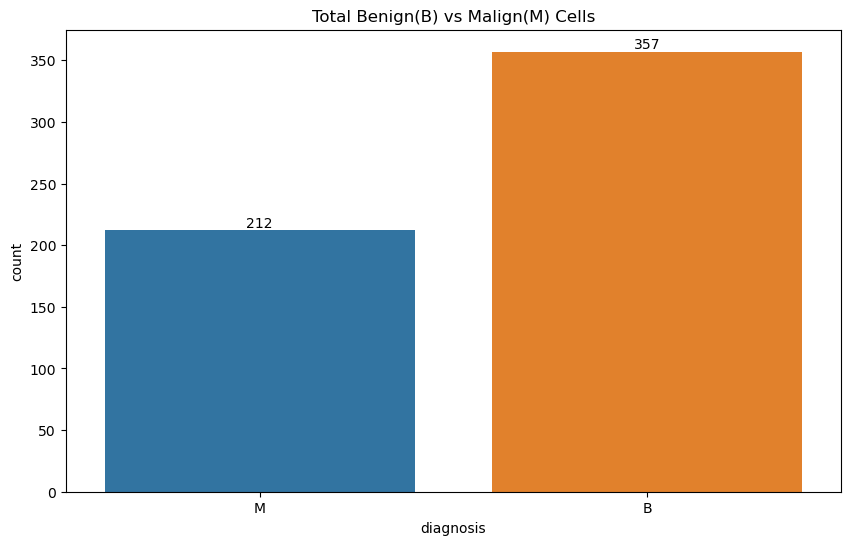

In [8]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x='diagnosis')
plt.title('Total Benign(B) vs Malign(M) Cells')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

From the chart above we can see that the dataset is somewhat unbalanced, meaning that one label tends to have many more values then the other.

For the purpose of this prototype, I will not do any more data analysis. Further analysis could include graphical visualization of the different features distreibution, variance, mean average, etc and the degree of correlation they have with each other. This will help one make an informed decision on what features to maintain and ones that should not be maintained. It is known that models with too many features do not necessarily get trained better and they consume more resources.</br>
For now one will use all features included in the dataset to implement this prototype.

## Data Normalization
Let's start by converting our target labels B and M into 0 and 1 respectively. This will make our data consistent in terms of datatypes, one that our model will accept.

In [9]:
#Convert our target labels in to numerical values
data['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True)

#display data table with new target label
data.head()

#confirm the the totals are correct
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Now we can start creating our train and test sets.

In [10]:
#split data into train and test sets. 80% train, 20% test.
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

print('data shape:',data.shape,'train set shape:', train_data.shape,'test set shape:', test_data.shape)
train_data.describe().transpose()

data shape: (569, 31) train set shape: (455, 31) test set shape: (114, 31)


,count,mean,std,min,25%,50%,75%,max
diagnosis,455.0,0.369231,0.483128,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,455.0,14.038009,3.443339,6.981000,11.665000,13.270000,15.815000,28.11000
texture_mean,455.0,19.254352,4.356593,9.710000,16.175000,18.800000,21.635000,39.28000
perimeter_mean,455.0,91.345407,23.756012,43.790000,75.015000,85.790000,104.200000,188.50000
area_mean,455.0,645.170549,336.691085,143.500000,417.450000,541.800000,785.600000,2499.00000
smoothness_mean,455.0,0.096414,0.014029,0.065760,0.085925,0.095920,0.105200,0.16340
compactness_mean,455.0,0.103311,0.052823,0.026500,0.062985,0.089630,0.130400,0.34540
concavity_mean,455.0,0.087379,0.080251,0.000000,0.028360,0.058350,0.126950,0.42680
concave points_mean,455.0,0.048025,0.038383,0.000000,0.019685,0.032640,0.068670,0.20120
symmetry_mean,455.0,0.181355,0.027769,0.106000,0.162000,0.179100,0.195650,0.30400


In [11]:
#create copies of our sets to manipulate in to our target albel sets
train_features = train_data.copy()
test_features = test_data.copy()
train_labels = train_features.pop('diagnosis')
test_labels = test_features.pop('diagnosis')
print('train label shape:', train_labels.shape,'test label shape:', test_labels.shape)

train label shape: (455,) test label shape: (114,)


In [12]:
#normalize our data in to tensors for use with the Keras API

#initialize our normalizer method
normalizer_train_data = preprocessing.Normalization()
normalizer_test_data = preprocessing.Normalization()

#adapt our data
normalizer_train_data.adapt(np.array(train_features))
normalizer_test_data.adapt(np.array(test_features))

#normalize our train and test set
x_train = normalizer_train_data(np.array(train_features))
x_test = normalizer_test_data(np.array(test_features))

#normalize our train labels set
y_train = np.asarray(train_labels).astype('float64')
y_test = np.asarray(test_labels).astype('float64')

In [13]:
#check our normalized data
print('Not normalized train data:', np.array(train_features))
print('Normalized train data', x_train.numpy())
x_train.shape

Not normalized train data: [[1.340e+01 2.052e+01 8.864e+01 ... 2.051e-01 3.585e-01 1.109e-01]
 [1.321e+01 2.525e+01 8.410e+01 ... 6.005e-02 2.444e-01 6.788e-02]
 [1.402e+01 1.566e+01 8.959e+01 ... 8.216e-02 2.136e-01 6.710e-02]
 ...
 [1.425e+01 2.172e+01 9.363e+01 ... 1.447e-01 3.591e-01 1.014e-01]
 [1.234e+01 2.686e+01 8.115e+01 ... 1.459e-01 3.215e-01 1.205e-01]
 [1.305e+01 1.931e+01 8.261e+01 ... 1.111e-02 2.439e-01 6.289e-02]]
Normalized train data [[-0.18549185  0.2908339  -0.11400868 ...  1.4103115   1.0828147
   1.5473167 ]
 [-0.24073145  1.3777397  -0.30532858 ... -0.8187316  -0.74751353
  -0.9153725 ]
 [-0.00523563 -0.8259448  -0.07397491 ... -0.47895807 -1.2415899
  -0.9600234 ]
 ...
 [ 0.06163339  0.5665814   0.09627452 ...  0.4821199   1.0924398
   1.0034873 ]
 [-0.49367124  1.7477014  -0.42964423 ...  0.50056064  0.48928148
   2.0968707 ]
 [-0.2872491   0.01278797 -0.3681185  ... -1.5708127  -0.7555342
  -1.201026  ]]


TensorShape([455, 30])

## Building the Prototype
One started by defining the model layers and units we will use. Since this is our first model attempt, we will start with a small network first, using fewer layers and units. We will start by using the relu activation and dense type layers since it has been found a good choice for this type of input data (vectors with scalar labels)


In [14]:
#model definition
model = models.Sequential()
model.add(keras.Input(shape=(30)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Next, we need to compile our model. For that we need to choose a loss function and a corresponding optimizer. There are some options available but for this prototype we will use as optimizer rmsprop and loss function binary_crossentropy. Accuracy will be used as a metric. Other metrics, optimizer and loss function will be considered for the full model release.

In [15]:
#model compilation
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
              metrics=['accuracy'])
              #metrics=['accuracy',keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


It is necessary to set aside some samples to work as a validation set. A model should never be evaluated in its training set. This validation set will be used to monitor the accuracy of the model during training. Let's set apart 100 samples for this purpose from the original training set.

In [16]:
#setting aside samples for a validation set using our training set
x_val = x_train[:100]
partial_x_train = x_train[100:]
y_val = y_train[:100]
partial_y_train = y_train[100:]

print('validation set shape:',x_val.shape)
print('partial training set shape:',partial_x_train.shape)

validation set shape: (100, 30)
partial training set shape: (355, 30)


Now it’s time to start training our model. We need to choose the number of epochs, mini batch size, starting with 20 and 512 respectively. We will monitor our validation and training loss by passing the training and validation sets to our model fit. The history object will store our training data so we can then use it to plot graphs and extract values for our analysis.

In [17]:
#Training the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (x_val, y_val)) 

Epoch 1/30
18/18 [==============================] - 1s 8ms/step - loss: 0.6674 - accuracy: 0.6563 - val_loss: 0.6072 - val_accuracy: 0.6300
Epoch 2/30
18/18 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.7493 - val_loss: 0.4717 - val_accuracy: 0.7600
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8479 - val_loss: 0.3601 - val_accuracy: 0.8800
Epoch 4/30
18/18 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.9014 - val_loss: 0.2764 - val_accuracy: 0.9200
Epoch 5/30
18/18 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.9155 - val_loss: 0.2201 - val_accuracy: 0.9400
Epoch 6/30
18/18 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.9324 - val_loss: 0.1782 - val_accuracy: 0.9400
Epoch 7/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9408 - val_loss: 0.1491 - val_accuracy: 0.9300
Epoch 8/30
18/18 [==

Now that our model is trained we can use matplot to help us plot the data in a visual representative way, that is, our loss and accuracy.

In [18]:
# get our dictionary keys
history_dict = history.history
history_dict.keys()

#get our loss values from the dictionary
history_dict['loss']

[0.6673529148101807,
 0.5114299654960632,
 0.40545663237571716,
 0.3236373960971832,
 0.2628702223300934,
 0.2168298363685608,
 0.1829802393913269,
 0.15673427283763885,
 0.13818715512752533,
 0.12403956800699234,
 0.11353156715631485,
 0.10577141493558884,
 0.0991121232509613,
 0.09407375752925873,
 0.09018491208553314,
 0.08635105937719345,
 0.08296473324298859,
 0.08053088933229446,
 0.07759791612625122,
 0.07517623156309128,
 0.0729493722319603,
 0.0714142844080925,
 0.06898599863052368,
 0.06738216429948807,
 0.06568541377782822,
 0.06349194794893265,
 0.06219387426972389,
 0.0609700046479702,
 0.05986064672470093,
 0.058307893574237823]

In [19]:
#get our validation loss
history_dict['val_loss']

[0.6071799993515015,
 0.4716753363609314,
 0.3601042926311493,
 0.2763906717300415,
 0.22008174657821655,
 0.1782262623310089,
 0.14911910891532898,
 0.1276574283838272,
 0.11314403265714645,
 0.10299957543611526,
 0.09605102241039276,
 0.09086782485246658,
 0.08626747131347656,
 0.08432193845510483,
 0.08224578946828842,
 0.08062651753425598,
 0.0804009810090065,
 0.07864056527614594,
 0.07809692621231079,
 0.07714838534593582,
 0.07654538005590439,
 0.07593069970607758,
 0.07601829618215561,
 0.07565247267484665,
 0.07624847441911697,
 0.0752486065030098,
 0.07493890821933746,
 0.07567189633846283,
 0.0748506709933281,
 0.07487449795007706]

In [20]:
#function used to plot train and validation loss
def plot_train_val_loss(train_loss, validation_loss):
    #map our values
    loss = train_loss
    val_loss = validation_loss

    #define x axis
    epochs = range(1, len(loss) + 1)

    #define graph legend
    blue_dots = 'bo'
    solid_blue_line = 'b'

    #plot our graph
    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return val_loss

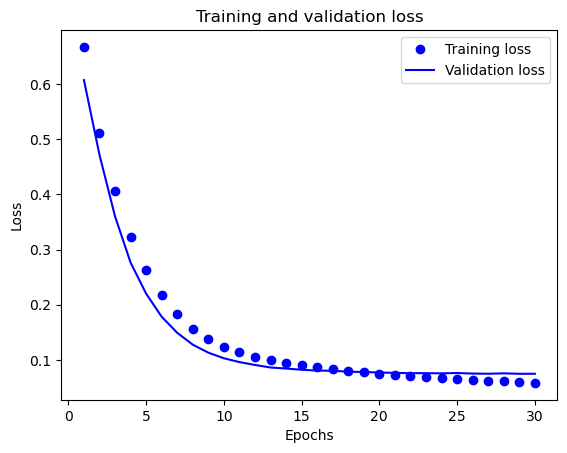

[0.6071799993515015,
 0.4716753363609314,
 0.3601042926311493,
 0.2763906717300415,
 0.22008174657821655,
 0.1782262623310089,
 0.14911910891532898,
 0.1276574283838272,
 0.11314403265714645,
 0.10299957543611526,
 0.09605102241039276,
 0.09086782485246658,
 0.08626747131347656,
 0.08432193845510483,
 0.08224578946828842,
 0.08062651753425598,
 0.0804009810090065,
 0.07864056527614594,
 0.07809692621231079,
 0.07714838534593582,
 0.07654538005590439,
 0.07593069970607758,
 0.07601829618215561,
 0.07565247267484665,
 0.07624847441911697,
 0.0752486065030098,
 0.07493890821933746,
 0.07567189633846283,
 0.0748506709933281,
 0.07487449795007706]

In [21]:
#plot our validation and training loss
plot_train_val_loss(history_dict['loss'],history_dict['val_loss'])

In [22]:
#get accuracy values
history_dict['accuracy']

[0.6563380360603333,
 0.7492957711219788,
 0.8478873372077942,
 0.9014084339141846,
 0.9154929518699646,
 0.9323943853378296,
 0.9408450722694397,
 0.9549295902252197,
 0.9549295902252197,
 0.9605633616447449,
 0.9577465057373047,
 0.9605633616447449,
 0.9605633616447449,
 0.9633802771568298,
 0.9633802771568298,
 0.9690141081809998,
 0.9718309640884399,
 0.9774647951126099,
 0.9774647951126099,
 0.9774647951126099,
 0.9774647951126099,
 0.9774647951126099,
 0.9774647951126099,
 0.9774647951126099,
 0.9774647951126099,
 0.9802817106246948,
 0.9802817106246948,
 0.9802817106246948,
 0.9802817106246948,
 0.9802817106246948]

In [23]:
#get validation accuracy values
history_dict['val_accuracy']

[0.6299999952316284,
 0.7599999904632568,
 0.8799999952316284,
 0.9200000166893005,
 0.9399999976158142,
 0.9399999976158142,
 0.9300000071525574,
 0.949999988079071,
 0.949999988079071,
 0.9399999976158142,
 0.9399999976158142,
 0.9399999976158142,
 0.9300000071525574,
 0.9399999976158142,
 0.9399999976158142,
 0.9399999976158142,
 0.9399999976158142,
 0.949999988079071,
 0.949999988079071,
 0.949999988079071,
 0.949999988079071,
 0.949999988079071,
 0.949999988079071,
 0.949999988079071,
 0.949999988079071,
 0.949999988079071,
 0.949999988079071,
 0.949999988079071,
 0.949999988079071,
 0.949999988079071]

In [24]:
#function used to plot our training and validation accuracy
def plot_train_val_accuracy(train_acc,validation_acc):
    plt.clf()

    acc = train_acc
    val_acc = validation_acc

    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, acc, blue_dots, label = 'Training acc')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

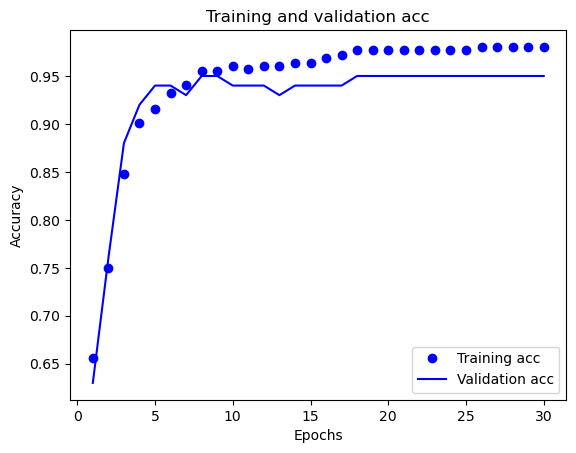

In [25]:
#plot our training and validation accuracy
plot_train_val_accuracy(history_dict['accuracy'],history_dict['val_accuracy'])

In [26]:
#optimal epoch
print(np.argmin(history_dict['val_loss'])+1, 'epochs')

29 epochs


Now that we know what’s the optimal number of epochs to avoid overfitting, we can retrain our dataset on the whole training data set. This approach will make our neural network more adequate to predict on unseen data, as the data trained is not too finetuned to the partial training data set. ,/br>
After that we evaluate the results on our testing dataset.

In [27]:
#re initiating our model
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

#model compilation
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#model fit using optimal epochs as training parameter and full training set
model.fit(x_train,y_train,epochs = np.argmin(history_dict['val_loss'])+1,batch_size = 20) 

#evaluate on our test dataset
results = model.evaluate(x_test, y_test)
results

Epoch 1/29
23/23 [==============================] - 0s 702us/step - loss: 0.5843 - accuracy: 0.7341
Epoch 2/29
23/23 [==============================] - 0s 665us/step - loss: 0.3757 - accuracy: 0.8967
Epoch 3/29
23/23 [==============================] - 0s 716us/step - loss: 0.2628 - accuracy: 0.9297
Epoch 4/29
23/23 [==============================] - 0s 695us/step - loss: 0.1967 - accuracy: 0.9407
Epoch 5/29
23/23 [==============================] - 0s 731us/step - loss: 0.1583 - accuracy: 0.9473
Epoch 6/29
23/23 [==============================] - 0s 702us/step - loss: 0.1340 - accuracy: 0.9516
Epoch 7/29
23/23 [==============================] - 0s 682us/step - loss: 0.1181 - accuracy: 0.9648
Epoch 8/29
23/23 [==============================] - 0s 731us/step - loss: 0.1073 - accuracy: 0.9604
Epoch 9/29
23/23 [==============================] - 0s 696us/step - loss: 0.0990 - accuracy: 0.9648
Epoch 10/29
23/23 [==============================] - 0s 662us/step - loss: 0.0912 - accuracy: 0.9648

[0.02697206288576126, 0.9912280440330505]

As we can see from the previous results our neural network model as achieve an accuracy of approximately 98%. Comparing to a baseline of 50% (random guessing the cell types) this is an excellent result.</br> We can now use our predictions to see how the model behaves on a practical setting. We do this by using the predict method.

In [28]:
predictions = model.predict(x_test, batch_size = 5)
print(predictions[:10])

23/23 [==============================] - 0s 566us/step
[[1.        ]
 [0.9999165 ]
 [1.        ]
 [0.9999886 ]
 [0.7227958 ]
 [0.99999976]
 [0.97306293]
 [0.9951579 ]
 [0.00116435]
 [0.00234205]]


We can see by the results provided that the model is very confident for some samples but not so much on others. The model is not perfect and that is expected. This does not mean that we cannot try to improve it. For the purpose of this prototype we will not be trying to do any hyper parameter fine tunning or trying a different API like the functional api. This will be done in the next iterations of this project starting below.

### Hyper Parameter Tuning
Now that we had a chance to see the results of our first model, we can try to improve its accuracy by fine tuning our hyper parameters. Some further exploration can be made on:<br>
a. changing the number of layers used;<br>
b. changing the number of units per layer (32,64,etc);<br>
c. using a different loss function, for example, mse instead of binary_crossentropy;<br>
d. using a different activation, for example, tanh instead of relu.<br><br>
For the sake of the length of this report we will not print out and plot every single experiment, instead we will leave one as an example and tabulate all results in this report for each experiment done.

In [29]:
#model definition using 1 intermidiate layer
#model = models.Sequential()
#model.add(layers.Dense(16, activation = 'relu'))
#model.add(layers.Dense(1, activation = 'sigmoid'))

#model definition using 3 intermidiate layer
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


#model compilation
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#Training the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (x_val, y_val)) 

Epoch 1/30
18/18 [==============================] - 0s 7ms/step - loss: 0.6382 - accuracy: 0.5972 - val_loss: 0.5079 - val_accuracy: 0.8600
Epoch 2/30
18/18 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.9155 - val_loss: 0.3699 - val_accuracy: 0.9200
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.9408 - val_loss: 0.2563 - val_accuracy: 0.9400
Epoch 4/30
18/18 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9437 - val_loss: 0.1873 - val_accuracy: 0.9200
Epoch 5/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.9549 - val_loss: 0.1472 - val_accuracy: 0.9300
Epoch 6/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1303 - accuracy: 0.9634 - val_loss: 0.1279 - val_accuracy: 0.9400
Epoch 7/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9718 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 8/30
18/18 [==

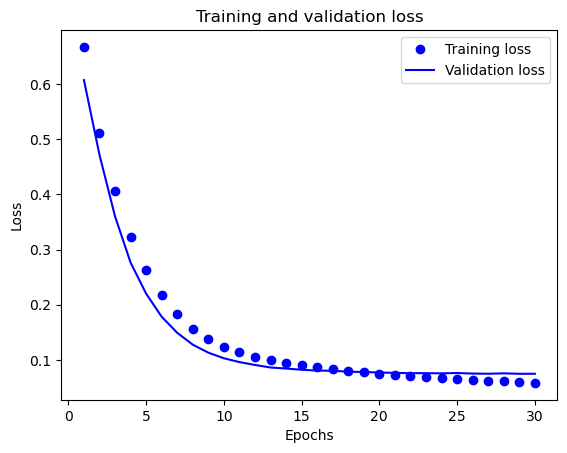

[0.6071799993515015,
 0.4716753363609314,
 0.3601042926311493,
 0.2763906717300415,
 0.22008174657821655,
 0.1782262623310089,
 0.14911910891532898,
 0.1276574283838272,
 0.11314403265714645,
 0.10299957543611526,
 0.09605102241039276,
 0.09086782485246658,
 0.08626747131347656,
 0.08432193845510483,
 0.08224578946828842,
 0.08062651753425598,
 0.0804009810090065,
 0.07864056527614594,
 0.07809692621231079,
 0.07714838534593582,
 0.07654538005590439,
 0.07593069970607758,
 0.07601829618215561,
 0.07565247267484665,
 0.07624847441911697,
 0.0752486065030098,
 0.07493890821933746,
 0.07567189633846283,
 0.0748506709933281,
 0.07487449795007706]

In [30]:
plot_train_val_loss(history_dict['loss'],history_dict['val_loss'])

In [31]:
print(np.argmin(history_dict['val_loss'])+1, 'epochs')

29 epochs


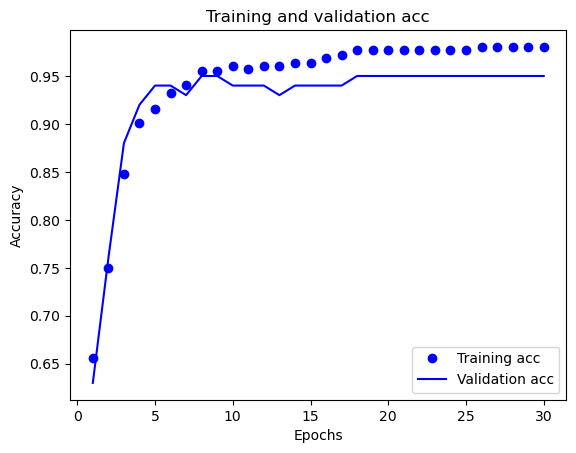

In [32]:
plot_train_val_accuracy(history_dict['accuracy'],history_dict['val_accuracy'])

In [33]:
#model fit using optimal epochs as training parameter and full training set
model.fit(x_train,y_train,epochs = np.argmin(history_dict['val_loss'])+1,batch_size = 20) 



Epoch 1/29
23/23 [==============================] - 0s 788us/step - loss: 0.0647 - accuracy: 0.9824
Epoch 2/29
23/23 [==============================] - 0s 679us/step - loss: 0.0558 - accuracy: 0.9846
Epoch 3/29
23/23 [==============================] - 0s 719us/step - loss: 0.0475 - accuracy: 0.9846
Epoch 4/29
23/23 [==============================] - 0s 709us/step - loss: 0.0431 - accuracy: 0.9824
Epoch 5/29
23/23 [==============================] - 0s 727us/step - loss: 0.0386 - accuracy: 0.9846
Epoch 6/29
23/23 [==============================] - 0s 714us/step - loss: 0.0339 - accuracy: 0.9868
Epoch 7/29
23/23 [==============================] - 0s 755us/step - loss: 0.0308 - accuracy: 0.9890
Epoch 8/29
23/23 [==============================] - 0s 731us/step - loss: 0.0292 - accuracy: 0.9890
Epoch 9/29
23/23 [==============================] - 0s 718us/step - loss: 0.0261 - accuracy: 0.9890
Epoch 10/29
23/23 [==============================] - 0s 715us/step - loss: 0.0250 - accuracy: 0.9890

In [34]:
#evaluate on our test dataset
results = model.evaluate(x_test, y_test)
results

4/4 [==============================] - 0s 1ms/step - loss: 0.0383 - accuracy: 0.9825


[0.038337867707014084, 0.9824561476707458]

Looking at the below table the optimal number of intermediate layers stands at 2.
<table>
  <tr>
    <th>Number of Intermidiate Layers</th>
    <th>Accuracy</th>
  </tr>
    <tr>
    <td>1</td>
    <td>0.9825</td>
  </tr>
  <tr>
    <td>2</td>
    <td>0.9912</td>
  </tr>
  <tr>
    <td>3</td>
    <td>0.9825</td>
  </tr>
</table>

### Number of Units
Using the optimal number of layers found earlier, we will now experiment with the number of units per layer for 32 and 64 units.

In [35]:
#model definition using 32 units in the intermidiate layers
#model = models.Sequential()
#model.add(layers.Dense(32, activation = 'relu'))
#model.add(layers.Dense(32, activation = 'relu'))
#model.add(layers.Dense(1, activation = 'sigmoid'))

#model definition using 64 units in the intermidiate layers
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

#model compilation
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#Training the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (x_val, y_val)) 

Epoch 1/30
18/18 [==============================] - 0s 6ms/step - loss: 0.4360 - accuracy: 0.8366 - val_loss: 0.2580 - val_accuracy: 0.9400
Epoch 2/30
18/18 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9408 - val_loss: 0.1675 - val_accuracy: 0.9200
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1504 - accuracy: 0.9606 - val_loss: 0.1231 - val_accuracy: 0.9600
Epoch 4/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9775 - val_loss: 0.0957 - val_accuracy: 0.9600
Epoch 5/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0895 - accuracy: 0.9831 - val_loss: 0.0817 - val_accuracy: 0.9700
Epoch 6/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9831 - val_loss: 0.0750 - val_accuracy: 0.9600
Epoch 7/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0670 - accuracy: 0.9803 - val_loss: 0.0715 - val_accuracy: 0.9600
Epoch 8/30
18/18 [==

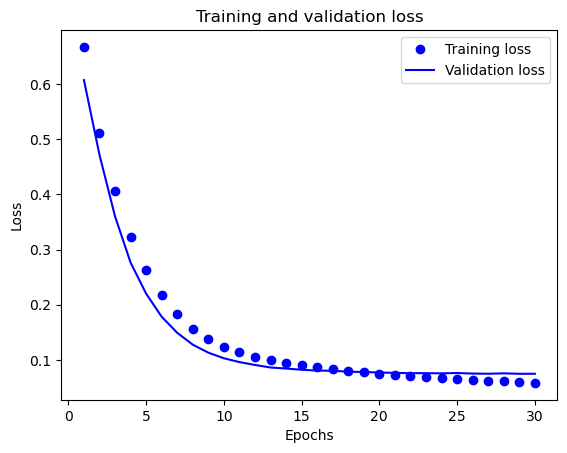

[0.6071799993515015,
 0.4716753363609314,
 0.3601042926311493,
 0.2763906717300415,
 0.22008174657821655,
 0.1782262623310089,
 0.14911910891532898,
 0.1276574283838272,
 0.11314403265714645,
 0.10299957543611526,
 0.09605102241039276,
 0.09086782485246658,
 0.08626747131347656,
 0.08432193845510483,
 0.08224578946828842,
 0.08062651753425598,
 0.0804009810090065,
 0.07864056527614594,
 0.07809692621231079,
 0.07714838534593582,
 0.07654538005590439,
 0.07593069970607758,
 0.07601829618215561,
 0.07565247267484665,
 0.07624847441911697,
 0.0752486065030098,
 0.07493890821933746,
 0.07567189633846283,
 0.0748506709933281,
 0.07487449795007706]

In [36]:
plot_train_val_loss(history_dict['loss'],history_dict['val_loss'])

In [37]:
print(np.argmin(history_dict['val_loss'])+1, 'epochs')

29 epochs


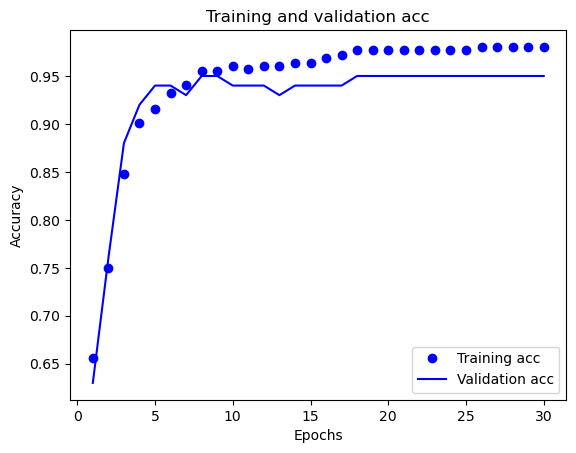

In [38]:
plot_train_val_accuracy(history_dict['accuracy'],history_dict['val_accuracy'])

In [39]:
#model fit using optimal epochs as training parameter and full training set
model.fit(x_train,y_train,epochs = np.argmin(history_dict['val_loss'])+1,batch_size = 20) 

Epoch 1/29
23/23 [==============================] - 0s 773us/step - loss: 0.0291 - accuracy: 0.9934
Epoch 2/29
23/23 [==============================] - 0s 683us/step - loss: 0.0200 - accuracy: 0.9956
Epoch 3/29
23/23 [==============================] - 0s 695us/step - loss: 0.0122 - accuracy: 0.9978
Epoch 4/29
23/23 [==============================] - 0s 729us/step - loss: 0.0111 - accuracy: 0.9978
Epoch 5/29
23/23 [==============================] - 0s 729us/step - loss: 0.0071 - accuracy: 1.0000
Epoch 6/29
23/23 [==============================] - 0s 683us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 7/29
23/23 [==============================] - 0s 683us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 8/29
23/23 [==============================] - 0s 710us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 9/29
23/23 [==============================] - 0s 745us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 10/29
23/23 [==============================] - 0s 697us/step - loss: 0.0041 - accuracy: 1.0000

In [40]:
#evaluate on our test dataset
results = model.evaluate(x_test, y_test)
results

4/4 [==============================] - 0s 1ms/step - loss: 0.1153 - accuracy: 0.9912


[0.11525397002696991, 0.9912280440330505]

It seems changing the number of units to 32 improves accuracy a little.
<table>
  <tr>
    <th>Number of Units</th>
    <th>Accuracy</th>
  </tr>
    <tr>
    <td>16</td>
    <td>0.9912</td>
  </tr>
  <tr>
    <td>32</td>
    <td>0.9978</td>
  </tr>
  <tr>
    <td>64</td>
    <td>0.9912</td>
  </tr>
</table>

### Using a Different Loss Function
Now we will try changing the type of loss function will using the optimal parameters we found so far. We will use 'mse' instead of 'binary_crossentropy'.

In [41]:
#model definition using 32 units in the intermidiate layers
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


#model compilation
model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

#Training the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (x_val, y_val)) 

Epoch 1/30
18/18 [==============================] - 0s 6ms/step - loss: 0.1338 - accuracy: 0.8958 - val_loss: 0.0831 - val_accuracy: 0.9200
Epoch 2/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9380 - val_loss: 0.0558 - val_accuracy: 0.9400
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9437 - val_loss: 0.0418 - val_accuracy: 0.9600
Epoch 4/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9577 - val_loss: 0.0333 - val_accuracy: 0.9700
Epoch 5/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9690 - val_loss: 0.0281 - val_accuracy: 0.9700
Epoch 6/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9662 - val_loss: 0.0255 - val_accuracy: 0.9700
Epoch 7/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9718 - val_loss: 0.0234 - val_accuracy: 0.9700
Epoch 8/30
18/18 [==

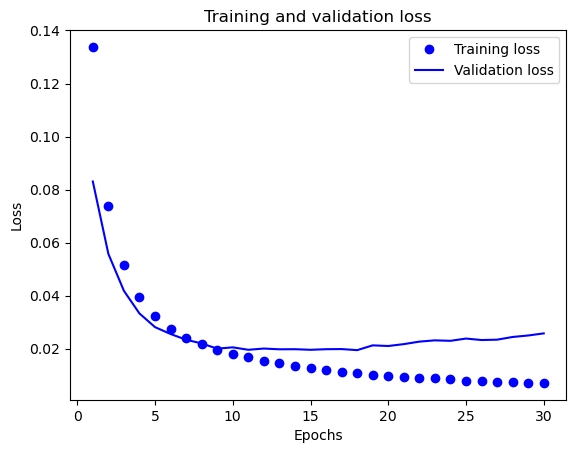

[0.08305484801530838,
 0.055763207376003265,
 0.04182170331478119,
 0.03328636288642883,
 0.02814326249063015,
 0.025547759607434273,
 0.023395834490656853,
 0.0219860952347517,
 0.02002144046127796,
 0.02051432617008686,
 0.019597157835960388,
 0.020061347633600235,
 0.019781608134508133,
 0.0198171678930521,
 0.01959186978638172,
 0.01981574483215809,
 0.019867844879627228,
 0.0194604080170393,
 0.02126495912671089,
 0.021023178473114967,
 0.02173105999827385,
 0.02267373353242874,
 0.023153720423579216,
 0.022979725152254105,
 0.023827750235795975,
 0.02327437698841095,
 0.023407835513353348,
 0.024427004158496857,
 0.024988457560539246,
 0.025777729228138924]

In [42]:
history_dict = history.history
history_dict.keys()

#calling function to plot validation, training loss
plot_train_val_loss(history_dict['loss'],history_dict['val_loss'])

In [43]:
#optimal epoch
print(np.argmin(history_dict['val_loss'])+1, 'epochs')

18 epochs


In [44]:
#accuracy for optimal epochs training
history_dict['accuracy'][np.argmin(history_dict['val_loss'])+1]

0.9887323975563049

In [45]:
#model fit using optimal epochs as training parameter and full training set
model.fit(x_train,y_train,epochs = np.argmin(history_dict['val_loss'])+1,batch_size = 20) 

Epoch 1/18
23/23 [==============================] - 0s 782us/step - loss: 0.0110 - accuracy: 0.9868
Epoch 2/18
23/23 [==============================] - 0s 700us/step - loss: 0.0087 - accuracy: 0.9934
Epoch 3/18
23/23 [==============================] - 0s 780us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 4/18
23/23 [==============================] - 0s 736us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 5/18
23/23 [==============================] - 0s 705us/step - loss: 0.0062 - accuracy: 0.9956
Epoch 6/18
23/23 [==============================] - 0s 686us/step - loss: 0.0060 - accuracy: 0.9956
Epoch 7/18
23/23 [==============================] - 0s 749us/step - loss: 0.0058 - accuracy: 0.9956
Epoch 8/18
23/23 [==============================] - 0s 701us/step - loss: 0.0055 - accuracy: 0.9956
Epoch 9/18
23/23 [==============================] - 0s 714us/step - loss: 0.0053 - accuracy: 0.9956
Epoch 10/18
23/23 [==============================] - 0s 693us/step - loss: 0.0052 - accuracy: 0.9956

In [46]:
#evaluate on our test dataset
results = model.evaluate(x_test, y_test)
results

4/4 [==============================] - 0s 667us/step - loss: 0.0110 - accuracy: 0.9825


[0.0109895383939147, 0.9824561476707458]

Binary cross entropy is still the better choice.
<table>
  <tr>
    <th>Loss Function</th>
    <th>Accuracy</th>
  </tr>
    <tr>
    <td>binary_crossentropy</td>
    <td>0.9978</td>
  </tr>
  <tr>
    <td>mse</td>
    <td>0.9825</td>
  </tr>
</table>

### Using a diferent activation, for example, tanh instead of relu
Finally, we try one last hyper parameter change, the activation. We will change it from relu to tanh, a type of activation very famous on the initial neural network’s times. Again, we will use all optimal hyper parameters so far.

In [47]:
#model definition using tanh activation function
model = models.Sequential()
model.add(layers.Dense(32, activation = 'tanh'))
model.add(layers.Dense(32, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))



#model compilation
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#Training the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (x_val, y_val)) 

Epoch 1/30
18/18 [==============================] - 0s 6ms/step - loss: 0.3790 - accuracy: 0.8873 - val_loss: 0.2266 - val_accuracy: 0.9200
Epoch 2/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9521 - val_loss: 0.1487 - val_accuracy: 0.9500
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1455 - accuracy: 0.9577 - val_loss: 0.1122 - val_accuracy: 0.9500
Epoch 4/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9662 - val_loss: 0.0936 - val_accuracy: 0.9500
Epoch 5/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1033 - accuracy: 0.9718 - val_loss: 0.0838 - val_accuracy: 0.9500
Epoch 6/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9746 - val_loss: 0.0759 - val_accuracy: 0.9700
Epoch 7/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0879 - accuracy: 0.9746 - val_loss: 0.0717 - val_accuracy: 0.9700
Epoch 8/30
18/18 [==

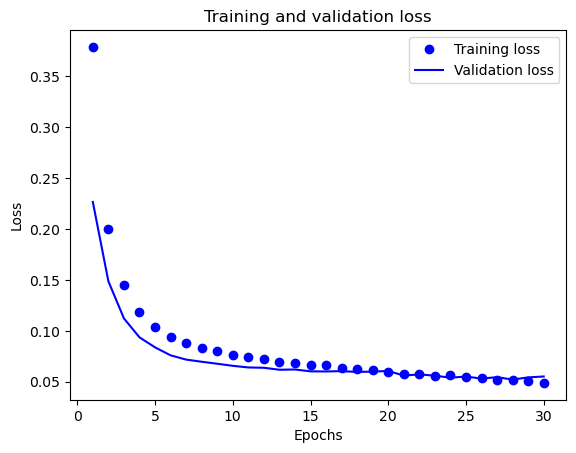

[0.22661983966827393,
 0.1487044394016266,
 0.1122220978140831,
 0.0935799703001976,
 0.08376312255859375,
 0.0759003534913063,
 0.07170809805393219,
 0.06960625946521759,
 0.06765639036893845,
 0.06560986489057541,
 0.06398230791091919,
 0.06369150429964066,
 0.06174111366271973,
 0.061988525092601776,
 0.060183051973581314,
 0.06004946678876877,
 0.060383155941963196,
 0.05960864946246147,
 0.059883877635002136,
 0.06056021526455879,
 0.056019481271505356,
 0.0571633018553257,
 0.055877067148685455,
 0.05396344140172005,
 0.05505350977182388,
 0.053053226321935654,
 0.05443486198782921,
 0.0520673468708992,
 0.05424312502145767,
 0.055112823843955994]

In [48]:
history_dict = history.history
history_dict.keys()

#calling function to plot validation, training loss
plot_train_val_loss(history_dict['loss'],history_dict['val_loss'])

In [49]:
#optimal epoch
print(np.argmin(history_dict['val_loss'])+1, 'epochs')

28 epochs


In [50]:
#accuracy for optimal epochs training
history_dict['accuracy'][np.argmin(history_dict['val_loss'])+1]

0.98591548204422

In [51]:
#model fit using optimal epochs as training parameter and full training set
model.fit(x_train,y_train,epochs = np.argmin(history_dict['val_loss'])+1,batch_size = 20) 

Epoch 1/28
23/23 [==============================] - 0s 799us/step - loss: 0.0482 - accuracy: 0.9846
Epoch 2/28
23/23 [==============================] - 0s 708us/step - loss: 0.0458 - accuracy: 0.9846
Epoch 3/28
23/23 [==============================] - 0s 733us/step - loss: 0.0442 - accuracy: 0.9824
Epoch 4/28
23/23 [==============================] - 0s 775us/step - loss: 0.0429 - accuracy: 0.9890
Epoch 5/28
23/23 [==============================] - 0s 706us/step - loss: 0.0417 - accuracy: 0.9868
Epoch 6/28
23/23 [==============================] - 0s 709us/step - loss: 0.0400 - accuracy: 0.9912
Epoch 7/28
23/23 [==============================] - 0s 729us/step - loss: 0.0389 - accuracy: 0.9890
Epoch 8/28
23/23 [==============================] - 0s 733us/step - loss: 0.0373 - accuracy: 0.9890
Epoch 9/28
23/23 [==============================] - 0s 686us/step - loss: 0.0347 - accuracy: 0.9934
Epoch 10/28
23/23 [==============================] - 0s 728us/step - loss: 0.0364 - accuracy: 0.9912

In [52]:
#evaluate on our test dataset
results = model.evaluate(x_test, y_test)
results

4/4 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9912


[0.02718193829059601, 0.9912280440330505]

The relu activation function is still the better choice.
<table>
  <tr>
    <th>Activation Function</th>
    <th>Accuracy</th>
  </tr>
    <tr>
    <td>relu</td>
    <td>0.9978</td>
  </tr>
  <tr>
    <td>tanh</td>
    <td>0.9912</td>
  </tr>
</table>

### Optimal Hyper Parameters
<table>
  <tr>
    <th>Number of Intermidiate Layers</th>
    <th>Number of Units</th>
    <th>Loss Function</th>
    <th>Activation</th>
  </tr>
    <tr>
    <td>2</td>
    <td>32</td>
    <td>binary_crossentropy</td>
    <td>relu</td>
  </tr>
</table>